In [30]:
# %pip install pandas
# %pip install scikit-learn
# %pip install seaborn
# %pip install umap-learn

import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import umap

import seaborn as sns

In [31]:
local_path = Path.cwd()
data = pd.read_csv(local_path / 'data' /  'HI_features.dat').drop(['cell_number','sex','BMI','age','insulin_SI'],axis=1)
# data = pd.read_csv(local_path / 'data' /  'HI_features.dat').drop(['cell_number','sex'],axis=1)

#strip mM from glucose column
data['glucose'] = data['glucose'].str.strip('mM')
data['glucose'] = data['glucose'].astype(float)

In [32]:
cell_types = data.pop('cell_type')
date = data.pop('date')
islet = data.pop('islet')

In [33]:
columns = list(data.columns)

#scale data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#new dataframe
data = pd.DataFrame(data, columns=columns)
data = data.fillna(0)

In [34]:
# for column in data.columns:
#     print(column)

In [35]:
umap_obj = umap.UMAP()
reduced = umap_obj.fit_transform(data)

In [36]:
# reduced

In [37]:
reduced_df = pd.DataFrame(reduced, columns=['UMAP1','UMAP2'])

In [38]:
reduced_df['cell_type'] = cell_types
reduced_df['date'] = date
reduced_df['islet'] = islet

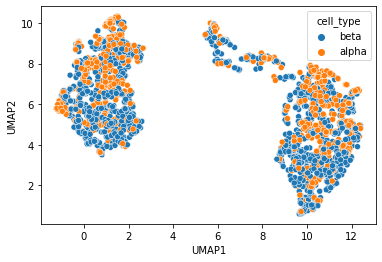

In [39]:
#use seaborn scatter UMAP1 and UMAP2, color by cell type
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='cell_type', palette='tab10')
plt.savefig(local_path/'Results'/'UMAP'/'UMAP_all.svg')

In [40]:
# reduced_df

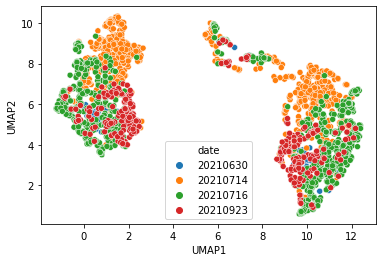

In [41]:
#use seaborn scatter UMAP1 and UMAP2, color by cell typec
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='date', palette='tab10')
plt.savefig(local_path/'Results'/'UMAP'/'UMAP_donor.svg')

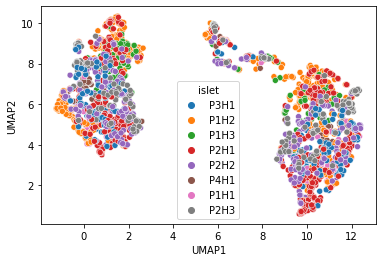

In [42]:
#use seaborn scatter UMAP1 and UMAP2, color by cell type
sns.scatterplot(data=reduced_df, x='UMAP1', y='UMAP2', hue='islet', palette='tab10')
plt.savefig(local_path/'Results'/'UMAP'/'UMAP_islet.svg')